# Exercise 2.11
### Introduction
This will work with the equation given in the book for the binomial coefficient. It helps calculate the probability. 

In [8]:
import numpy as np
import matplotlib.pyplot as plt

#Part A
def binomial(n,k):
    if k ==0:
        return 1
    else:
        return int(np.math.factorial(n)/np.math.factorial(k)/np.math.factorial(n-k))

#Part B
print("Pascal's Triangle")
for n in range(1,21):
    row = []
    for k in range(n+1):
        row.append(binomial(n,k))
    print(np.array(row))
    
print()

#Part C
num_tosses = 100
heads = 60

def probability(n,k):
    return binomial(n,k)/2**n

print(f'Probability of {heads} heads in {num_tosses} tosses: {probability(num_tosses,heads)*100:.3f}%')

total_probability = 0
for head in range(heads,num_tosses+1):
    total_probability += probability(num_tosses,head)
    
print(f'Probability of {heads} or more heads in {num_tosses} tosses: {total_probability*100:.3f}%')

Pascal's Triangle
[1 1]
[1 2 1]
[1 3 3 1]
[1 4 6 4 1]
[ 1  5 10 10  5  1]
[ 1  6 15 20 15  6  1]
[ 1  7 21 35 35 21  7  1]
[ 1  8 28 56 70 56 28  8  1]
[  1   9  36  84 126 126  84  36   9   1]
[  1  10  45 120 210 252 210 120  45  10   1]
[  1  11  55 165 330 462 462 330 165  55  11   1]
[  1  12  66 220 495 792 924 792 495 220  66  12   1]
[   1   13   78  286  715 1287 1716 1716 1287  715  286   78   13    1]
[   1   14   91  364 1001 2002 3003 3432 3003 2002 1001  364   91   14
    1]
[   1   15  105  455 1365 3003 5005 6435 6435 5005 3003 1365  455  105
   15    1]
[    1    16   120   560  1820  4368  8008 11440 12870 11440  8008  4368
  1820   560   120    16     1]
[    1    17   136   680  2380  6188 12376 19448 24310 24310 19448 12376
  6188  2380   680   136    17     1]
[    1    18   153   816  3060  8568 18564 31824 43758 48620 43758 31824
 18564  8568  3060   816   153    18     1]
[    1    19   171   969  3876 11628 27132 50388 75582 92378 92378 75582
 50388 27132 1162

### Conclusion
This was not terrible. It took a second for me to understand how to do part b. I think I did the right thing for part c by adding the probabilities together, but I don't know. 

# Exercise 3.1
### Introduction
This will work with graphing from a data file. 

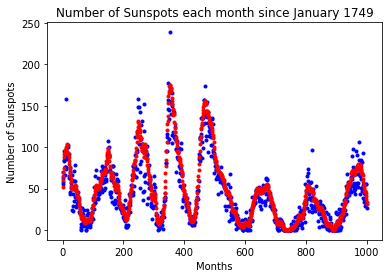

In [31]:
#Parts A & B
data=np.loadtxt('sunspots.txt')
plt.plot(data[:1000,0],data[:1000,1],'b.')
plt.title('Number of Sunspots each month since January 1749')
plt.xlabel('Months')
plt.ylabel('Number of Sunspots')

#Part C
for idx in range(0,1001):
    r = 5
    yk_sum = 0
    for m in range(-r,r+1):
        yk_sum += data[idx+m][1]
    Yk = 1/2/r * yk_sum
    plt.plot(idx,Yk,'r.')
    
plt.show()

### Conclusion
The hard part of this for me was understanding the math in the exercise. I couldn't do it at first. I think the graph of the running average makes sense. 

# Exercise 2.10 (cont.)

### Intro
This code will calculate binding energy for input values. Then highest binding energy per nucleon. The highest binding per nucleon for a given atomic number will be calculated. Lastly, The highest binding energy per nucleon for elements 1-100 will be found.

$$ B = a_1 A - a_2 A^{{2\over3}}-a_3{Z^2 \over A^{{1\over3}}}-a_4{(A-2Z)^2\over A}+{a_5 \over A^{{1 \over 2}}}$$

Now I am plotting binding energy per nucleon as a function of atomic number.

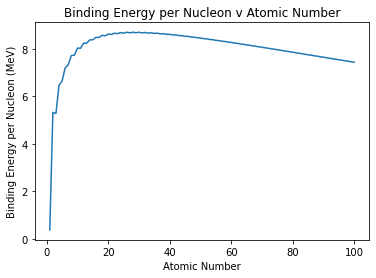

In [21]:
import numpy as np
import matplotlib.pyplot as plt
def binding_energy(Z,A):
    a1 = 15.8
    a2 = 18.3
    a3 = 0.714
    a4 = 23.2
    if A%2 ==0:
        if Z%2 == 0:
            a5 = 12  #a5 value depends on odd and even of A and Z
        else:
            a5 = -12
    else:
        a5 = 0
    return a1*A-a2*A**(2/3)-a3*Z**2 / A**(1/3)-a4*(A-2*Z)**2/A+a5/A**(1/2) #Equation found in book and above
def maxBindingPerNucleon(Z):
    maxBpN = 0
    maxA = 0
    for A in range(Z,3*Z+1):
        BpN = binding_energy(Z,A)/A  #calculates binding energy and divides by # of nucleons for binding energy per nucleon
        if BpN> maxBpN:  # If value calculated above is higher than max, it is the new max
            maxBpN=BpN
            maxA = A
    return maxA #Returns the mass number with the highest bnding energy per nucleon
#Part D
maxZ = []
for Z in range(1,101):
    #print(f'Z = {Z}, A= {maxBindingPerNucleon(Z)}, BpN= {binding_energy(Z,maxBindingPerNucleon(Z))/maxBindingPerNucleon(Z):.3f} MeV')
    maxZ.append(binding_energy(Z,maxBindingPerNucleon(Z))/maxBindingPerNucleon(Z)) # appends the highest binding energy for each atomic number
#print()
#print(f'The maximum binding energy per nucleon occurs at Z = {maxZ.index(max(maxZ))+1}')
plt.plot(range(1,101),maxZ)
plt.title('Binding Energy per Nucleon v Atomic Number')
plt.xlabel('Atomic Number')
plt.ylabel('Binding Energy per Nucleon (MeV)')
plt.show()

### Conclusion
The graph is a lot like what is expected. There are some anomolies in nature that do not show up.

# Ripples.py

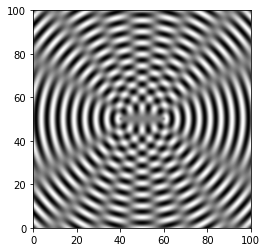

In [26]:
from math import sqrt,sin,pi
from numpy import empty
from pylab import imshow,gray,show, colorbar

wavelength = 5.0
k = 2*pi/wavelength
xi0 = 1.0
separation = 20.0      # Separation of centers in cm
side = 100.0           # Side of the square in cm
points = 500           # Number of grid points along each side
spacing = side/points  # Spacing of points in cm


# Calculate the positions of the centers of the circles
x1 = side/2 + separation/2
y1 = side/2
x2 = side/2 - separation/2
y2 = side/2

# Make an array to store the heights
xi = empty([points,points],float)

# Calculate the values in the array
for i in range(points):
    y = spacing*i
    for j in range(points):
        x = spacing*j
        r1 = sqrt((x-x1)**2+(y-y1)**2)
        r2 = sqrt((x-x2)**2+(y-y2)**2)
        xi[i,j] = xi0*sin(k*r1) + xi0*sin(k*r2)

# Make the plot
imshow(xi,origin="lower",extent=[0,side,0,side])
show()
